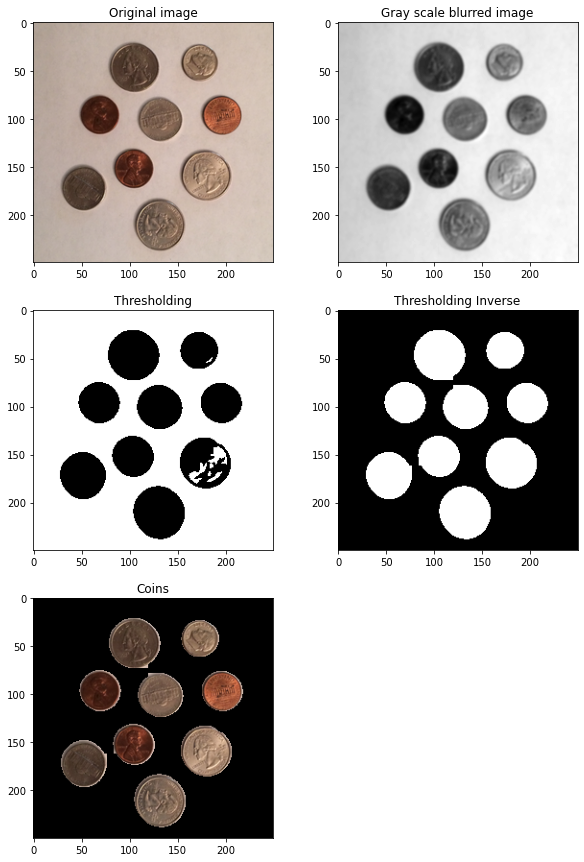

In [31]:
import cv2
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),0)

#Create Structuring element elliptic 5x5
EL55 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,9))

#Thresholding image
#cv2.threshold(input_image, threshold_value, maximum_value, cv2.THRESH_BINARY(cv2.THRESH_BINARY_INV))
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

#Morphology Operation
threshInv = cv2.morphologyEx(threshInv, cv2.MORPH_CLOSE, EL55)

#Masking image with inverse thresholding
coins = cv2.bitwise_and(image, image, mask=threshInv)


#Plot image
fig = plt.figure(figsize=(10, 15))
##############ax1###################
ax1 = fig.add_subplot(3,2,1)
ax1.set(title='Original image')
ax1.imshow(image)
##############ax2###################
ax2 = fig.add_subplot(3,2,2)
ax2.set(title='Gray scale blurred image')
ax2.imshow(blurred, cmap='gray')
##############ax3###################
ax3 = fig.add_subplot(3,2,3)
ax3.set(title='Thresholding')
ax3.imshow(thresh, cmap='gray')
##############ax4###################
ax4 = fig.add_subplot(3,2,4)
ax4.set(title='Thresholding Inverse')
ax4.imshow(threshInv, cmap='gray')
##############ax5###################
ax5 = fig.add_subplot(3,2,5)
ax5.set(title='Coins')
ax5.imshow(coins)